In [12]:
import numpy as np
import pandas as pd

#Bibloteki do wizualizacji
import matplotlib.pyplot as plt
import seaborn as sns

# Bibloteka scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import clone

In [2]:
def get_X():
    tablica = np.random.rand(100, 1)
    
    return 6 * tablica - 3


def get_y(X):
    tablica = np.random.randn(100, 1)
    
    return 0.5 * X ** 2 + X + 2 + tablica

In [3]:
X = get_X()
X = np.array(sorted(X))
y = get_y(X)

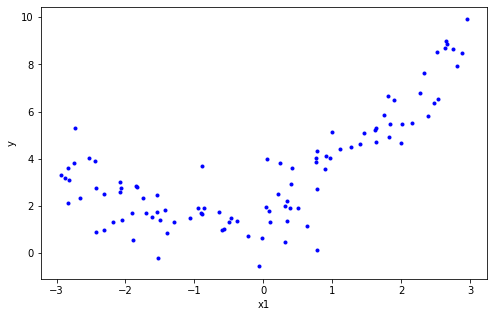

In [4]:
plt.figure(figsize=(8, 5))
plt.xlabel('x1')
plt.ylabel('y')
plt.plot(X, y, 'b.')
plt.show()

In [5]:
def krzywe_uczenia(X, y, main_model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    train_error, test_error = [], []
    for m in range(1, len(X_train)):
        model = main_model
        model.fit(X_train[:m], y_train[:m])
        
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        
        train_error.append(mse(y_train[:m], y_train_predict))
        test_error.append(mse(y_test, y_test_predict))
        
    plt.figure(figsize=(8, 5))
    plt.xlabel('Rozmiar zestawu danych')
    plt.ylabel('Błąd MSE')
    plt.plot(np.sqrt(train_error), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(test_error), 'b-', linewidth=3, label='test')
    plt.ylim([0,3])
    plt.legend()
    plt.show()

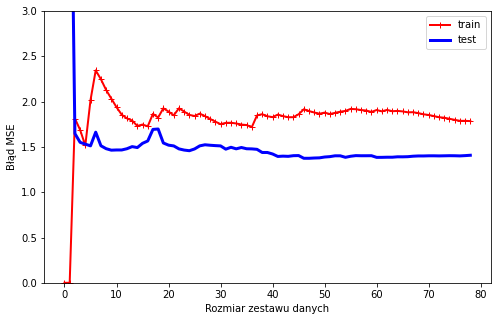

In [6]:
lin_reg = LinearRegression()
krzywe_uczenia(X, y, lin_reg)

In [7]:
polynomical_regression = Pipeline([
    ('poly', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])

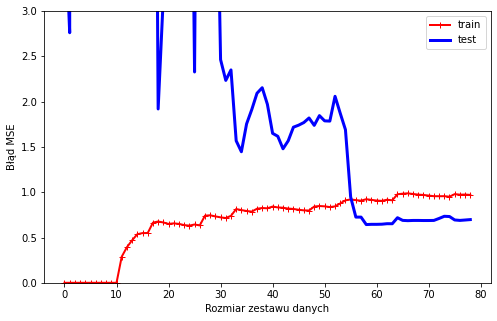

In [8]:
krzywe_uczenia(X, y, polynomical_regression)